In [266]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Luca Valderramos Cirino
## Matrícula: 211066140

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [267]:
#Código das funções utilizadas.

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

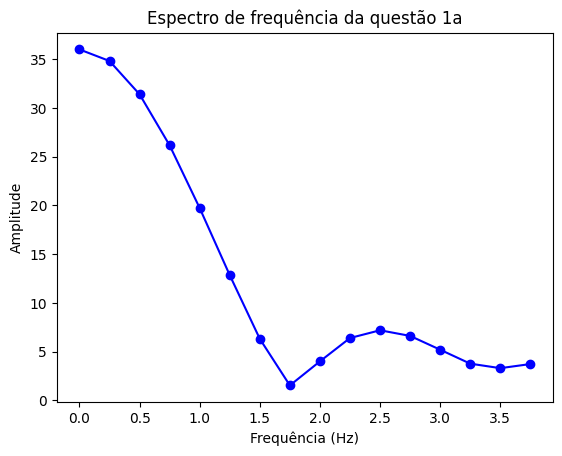

In [268]:
#Resposta da questão 1a

N = 4 * 8
T = 1/8
t = np.arange(0, 4, T)

signal = 8 * np.where(t > 0.5, 0, np.where(t == 0.5, 0.5, 1))


f = np.fft.fftfreq(N, T)
transf = np.fft.fft(signal)
transf = np.abs(transf)

plt.plot(f[f>=0], transf[f>=0], 'bo-')
plt.title('Espectro de frequência da questão 1a')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')

plt.show()



## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

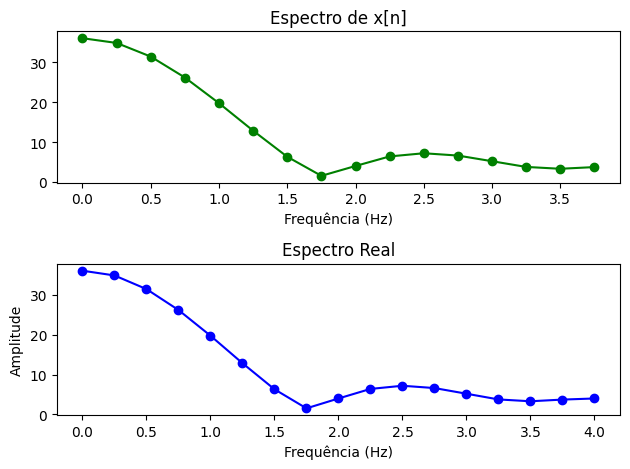

In [269]:
#Resposta da questão 1b

plt.subplot(211)
plt.plot(f[f>=0], transf[f>=0], 'go-')
plt.title('Espectro de x[n]')
plt.xlabel('Frequência (Hz)')

f_real = np.fft.rfftfreq(N, T)
amplitude_real = np.fft.rfft(signal)
amplitude_real = np.abs(amplitude_real)

plt.subplot(212)
plt.plot(f_real, amplitude_real, 'bo-')
plt.title('Espectro Real')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()



# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

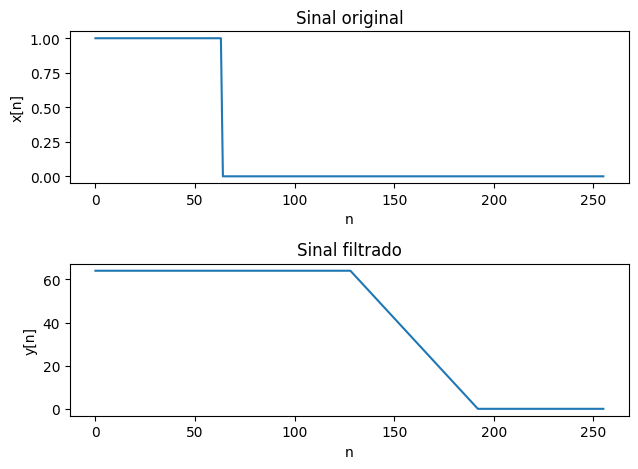

In [275]:
#Resposta da questão 2a

N = 256
n = np.arange(N)
signal = np.where(n < 64, 1, 0)

fs = N // 16
h1 = np.ones(N)
h1[fs] = 0

signal_filtered = np.convolve(signal, h1, 'same')

plt.subplot(211)
plt.plot(n, signal)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Sinal original')

plt.subplot(212)
plt.plot(n, signal_filtered)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Sinal filtrado')

plt.tight_layout()
plt.show()



## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

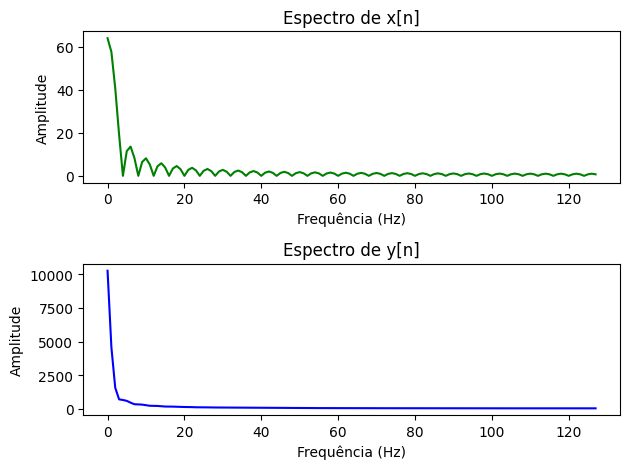

In [277]:
#Resposta da questão 2b

X, Y = np.fft.fft(signal), np.fft.fft(signal_filtered)
f = np.fft.fftfreq(N, 1/N)

plt.subplot(211)
plt.plot(f[f>=0], np.abs(X[f>=0]), 'g-')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de x[n]')

plt.subplot(212)
plt.plot(f[f>=0], np.abs(Y[f>=0]), 'b-')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de y[n]')

plt.tight_layout()
plt.show()


## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


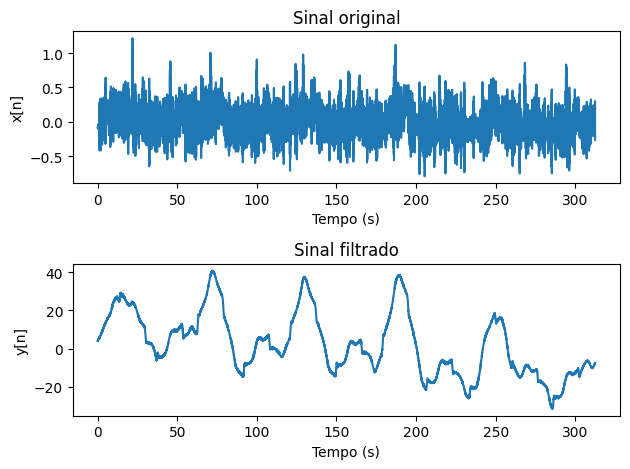

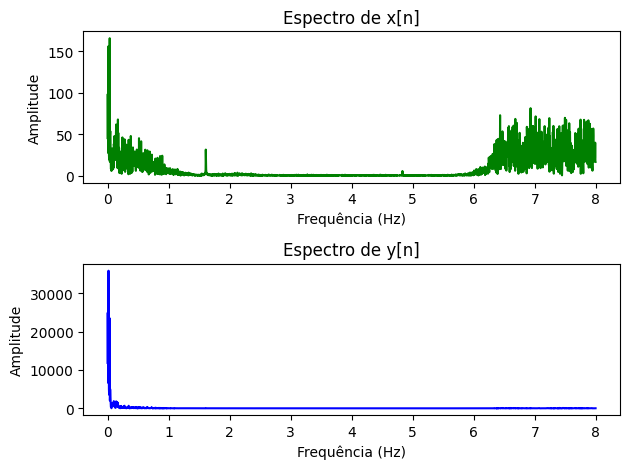

In [274]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

N = len(sinal)
fc = 1/16
fs = 1 // fc
t = np.arange(0, N/fs, 1/fs)

signal_filtered = np.convolve(sinal, h1, 'same')

plt.subplot(211)
plt.plot(t, sinal)
plt.xlabel('Tempo (s)')
plt.ylabel('x[n]')
plt.title('Sinal original')

plt.subplot(212)
plt.plot(t, signal_filtered)
plt.xlabel('Tempo (s)')
plt.ylabel('y[n]')
plt.title('Sinal filtrado')

plt.tight_layout()
plt.show()

X, Y = np.fft.fft(sinal), np.fft.fft(signal_filtered)
f = np.fft.fftfreq(N, 1/fs)

plt.subplot(211)
plt.plot(f[f>=0], np.abs(X[f>=0]), 'g-')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de x[n]')

plt.subplot(212)
plt.plot(f[f>=0], np.abs(Y[f>=0]), 'b-')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de y[n]')

plt.tight_layout()
plt.show()



# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [273]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()
